#  ---------- Bike Sharing System 2011 ----------


<img src='descarga.png' width='800px' height='100px'>

*****


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Carga de Datos

In [3]:
df = pd.read_csv('./data/bike+sharing+dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

Como solo voy a trabajar con un año para mi hipótesis. Elegí el 2011.

In [5]:
df2011= df.query('yr == 0')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df2011.shape

(8645, 17)

In [7]:
df2011.to_csv('./data/Dataset_2011.csv', index=False) 

In [8]:
df2012 = df.query('yr == 1')
df2012.to_csv('./data/Dataset_2012.csv', index=False)

## Primera exploración

In [9]:
df2011 = pd.read_csv('./data/Dataset_2011.csv',sep=',')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df2011.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
df2011.shape

(8645, 17)

In [12]:
df2011.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  casual      8645 non-null   int64  
 15  registered  8645 non-null   int64  
 16  cnt         8645 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.1+ MB


In [14]:
df2011.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8645.000000,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,2495.740872,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,4323.000000,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,6484.000000,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,8645.000000,4.000000,0.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


## Limpieza

In [15]:
df2011.set_index('instant',inplace=True)
df2011.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
df2011['dteday'] = pd.to_datetime(df2011['dteday'])
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      8645 non-null   datetime64[ns]
 1   season      8645 non-null   int64         
 2   yr          8645 non-null   int64         
 3   mnth        8645 non-null   int64         
 4   hr          8645 non-null   int64         
 5   holiday     8645 non-null   int64         
 6   weekday     8645 non-null   int64         
 7   workingday  8645 non-null   int64         
 8   weathersit  8645 non-null   int64         
 9   temp        8645 non-null   float64       
 10  atemp       8645 non-null   float64       
 11  hum         8645 non-null   float64       
 12  windspeed   8645 non-null   float64       
 13  casual      8645 non-null   int64         
 14  registered  8645 non-null   int64         
 15  cnt         8645 non-null   int64         
dtypes: datetime64[ns](1), float64

In [17]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])['cnt'].sum() #Faltan días festivos, 1 de Enero, 25 de Diciembre

dteday      holiday  weekday
2011-01-17  1        1          1000
2011-02-21  1        1          1107
2011-04-15  1        5          3126
2011-05-30  1        1          4098
2011-07-04  1        1          6043
2011-09-05  1        1          3351
2011-10-10  1        1          5117
2011-11-11  1        5          3368
2011-11-24  1        4          1495
2011-12-26  1        1          1317
Name: cnt, dtype: int64

In [18]:
# Al faltar días festivos, los agregamos.
dias_festivos = ['2011-01-01', '2011-01-17', '2011-02-14', '2011-02-21','2011-04-24', '2011-05-30', '2011-07-04', '2011-09-05','2011-10-10', '2011-10-31', '2011-11-11', '2011-12-24','2011-12-25']

# Convierte la lista de días festivos a formato datetime.
dias_festivos = pd.to_datetime(dias_festivos)

# Reescribe la columna 'holiday' asignando 1 si la fecha está en la lista de días festivos, 0 en caso contrario.
df2011['holiday'] = (df2011['dteday'].isin(dias_festivos)).astype(int)

df2011['day'] = df2011['dteday'].dt.day

df2011['weekday'] = df2011['dteday'].dt.day_of_week


In [19]:
# Función para actualizar la columna 'workingday' en base a las condiciones dadas
def actualizar_workingday(row):
    if row['weekday'] in [5, 6] or row['holiday'] == 1:
        return 0
    else:
        return 1

In [20]:
# Aplicar la función a cada fila del DataFrame
df2011['workingday'] = df2011.apply(actualizar_workingday, axis=1)

In [21]:
df2011.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,1,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,2011-01-01,1,0,1,1,1,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01,1,0,1,2,1,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,2011-01-01,1,0,1,3,1,5,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,2011-01-01,1,0,1,4,1,5,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [22]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])['cnt'].sum() 

dteday      holiday  weekday
2011-01-01  1        5           985
2011-01-17  1        0          1000
2011-02-14  1        0          1913
2011-02-21  1        0          1107
2011-04-24  1        6          4191
2011-05-30  1        0          4098
2011-07-04  1        0          6043
2011-09-05  1        0          3351
2011-10-10  1        0          5117
2011-10-31  1        0          3669
2011-11-11  1        4          3368
2011-12-24  1        5          1011
2011-12-25  1        6           754
Name: cnt, dtype: int64

In [23]:
df2011.drop(columns=['yr'],inplace=True) 
df2011.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,1,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,2011-01-01,1,1,1,1,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01,1,1,2,1,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,2011-01-01,1,1,3,1,5,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,2011-01-01,1,1,4,1,5,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


- La instancia la tomaré como índice.
- Los días festivos ('holiday'), los días de la semana ('weekday') no eran correctos, así que tuvimos que arreglarlos reescribiendo los mismos.
- los 'Workingday' se basan en 'holiday' y  weekday' por ende, también me propuse a reescribirlo en base a aquellas variables para eviatr errores futuros.
- Eliminamos la variable **'yr'** ya que representaba el 2011 en valores = 0.

****

In [24]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.035975,3.009485,0.686408,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448,15.665240
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000,8.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000,16.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000,23.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000,31.000000
std,NaN,1.105477,3.428147,6.907822,0.186237,2.000845,0.463979,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854,8.793108


- Season: Podemos ver que la temporada de verano abarca la media y el 75%.
- temp, atemp, hum: Los valores normalizados no son tan visibles al momento de tratar o mismo gráficar aquellos datos.
- casual, registered, cnt : Los valores máximos se encuentran bastante alejados.


*****

- **temp**: Temperatura normalizada en Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

- **atemp**: Sensación térmica normalizada en Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

- **hum**: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

- **windspeed**: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

*Aplicamos la fórmula ajustada:*

Temperatura Discreta = valor_ajustado_temp = **0.24** **×** multiplicamos por su ajuste = **41**

*Calculamos el resultado:*

Temperatura Discreta = round(9.84)

Temperatura Discreta =10

In [25]:
df2011 = df2011.assign(
    temperature = (lambda x : round(x.temp * 41)),
    thermal_sensation = (lambda x : round(x.atemp * 50)),
    humidity = (lambda x : round(x.hum * 100)),
    wind_speed = (lambda x: round(x.windspeed * 67))
)

In [26]:
df2011.drop(columns= ['temp','atemp','hum', 'windspeed'], inplace=True)

In [27]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.035975,3.009485,0.686408,1.437594,28.600578,115.193869,143.794448,15.665240,20.035049,23.453788,64.342973,12.808213
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,26.000000,31.000000,8.000000,13.000000,16.000000,49.000000,7.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,14.000000,90.000000,109.000000,16.000000,20.000000,24.000000,65.000000,13.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,38.000000,168.000000,211.000000,23.000000,27.000000,31.000000,81.000000,19.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,272.000000,567.000000,651.000000,31.000000,39.000000,50.000000,100.000000,57.000000
std,NaN,1.105477,3.428147,6.907822,0.186237,2.000845,0.463979,0.653859,38.840789,109.461014,133.797854,8.793108,8.126433,8.851484,19.629328,8.253896


*****

- Ahora analizaremos si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipótesis.

El dataframe se encuentra armado en base a horas, es decir, por día tendremos 24 registros.

- *Nos damos cuenta que faltan datos: **365 * 24 = 8760***

In [28]:
df2011.shape

(8645, 16)

In [29]:
df2011['dteday'].nunique()

365

In [30]:
df_hour = df2011.groupby(['dteday','mnth'])[['hr']].count()
df_hour

,,hr
dteday,mnth,
2011-01-01,1,24
2011-01-02,1,23
2011-01-03,1,22
2011-01-04,1,23
2011-01-05,1,23
...,...,...
2011-12-27,12,24
2011-12-28,12,23
2011-12-29,12,24


In [31]:
df_hour.query('hr <= 23').sort_values(by='mnth') 

,,hr
dteday,mnth,
2011-01-02,1,23
2011-01-30,1,23
2011-01-29,1,23
2011-01-28,1,23
2011-01-27,1,8
2011-01-26,1,16
2011-01-25,1,23
2011-01-23,1,23
2011-01-22,1,23


- Como no hubo utilidad de las bicicletas durante dichas horas, no figura en la Base de Datos. Ahora la pregunta es, vale rellenar con valores aquellas filas restantes que equivalen al 1,43% del total.

La respuesta es:  Depende de lo que queramos resolver.
EXPLICAR EL PORQUE DE NUESTRA DECISIÓN Y SI LO HARÍAMOS COMO?

In [32]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
hr                   0
holiday              0
weekday              0
workingday           0
weathersit           0
casual               0
registered           0
cnt                  0
day                  0
temperature          0
thermal_sensation    0
humidity             0
wind_speed           0
dtype: int64

In [33]:
df2011[(df2011['dteday'].isna()) | (df2011['season'].isna()) | (df2011['mnth'].isna()) | (df2011['hr'].isna()) | (df2011['holiday'].isna()) |
       (df2011['weekday'].isna()) | (df2011['workingday'].isna()) | (df2011['weathersit'].isna()) | (df2011['casual'].isna()) |
       (df2011['registered'].isna()) | (df2011['cnt'].isna()) | (df2011['day'].isna()) | (df2011['temperature'].isna()) |
       (df2011['thermal_sensation'].isna()) | (df2011['humidity'].isna()) | (df2011['wind_speed'].isna())]

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
instant,,,,,,,,,,,,,,,,


In [34]:
df2011.duplicated(keep=False).sum()

0

In [35]:
column_order = ['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday', 'workingday', 'temperature', 'thermal_sensation', 'humidity',
                'weathersit',  'wind_speed', 'casual', 'registered', 'cnt']

# Reordenar las columnas
df2011 = df2011[column_order]

In [36]:
df2011.columns

Index(['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday',
       'workingday', 'temperature', 'thermal_sensation', 'humidity',
       'weathersit', 'wind_speed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [37]:
df2011.to_csv('./data/Dataset_clear_2011.csv')

## Análisis 

### Análisis Univariante

In [53]:
df2011 = pd.read_csv('./data/Dataset_clear_2011.csv',index_col='instant',parse_dates=['dteday'])
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,1,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,1,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,1,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,1,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,1,0,10.0,14.0,75.0,1,0.0,0,1,1


 ¿Es dispersa? ¿Tiene asimetría? ¿En qué sentido? ¿Por qué? ¿Hay outliers?

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analisis_univariante(df):
    plt.figure(figsize=(8, 5))       
        
    for columna in df.columns:     
         
        if df[columna].dtypes == 'float64':
            # Calcular medidas estadísticas
            media = df[columna].mean()
            mediana = df[columna].median()
            moda = df[columna].mode().iloc[0] 
            std = df[columna].std()
            percentilbajo, percentilalto = df[columna].quantile([0.25,0.75])
            
            sns.histplot(df[columna])
            
            # # Marcar la media con una línea vertical y una anotación
            plt.axvline(media, color='red', linestyle='dashdot', linewidth=2, label=f'Media: {media:.2f}')

            # # Marcar la mediana con una línea vertical y una anotación
            plt.axvline(mediana, color='green', linestyle='dashdot', linewidth=2, label=f'Mediana: {mediana:.2f}')

            # # Marcar la moda con una línea vertical y una anotación
            plt.axvline(moda, color='violet', linestyle='solid', linewidth=2, label=f'Moda: {moda:.2f}')
            
            plt.axvline(media + std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            plt.axvline(media - std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            
            plt.axvline(percentilbajo, color='yellow', linestyle='solid', linewidth=2, label=f'Q-25: {percentilbajo:.2f}')       
            plt.axvline(percentilalto, color='yellow', linestyle='solid', linewidth=2, label=f'Q-75: {percentilalto:.2f}')
            
            plt.legend()
          

            print('****' * 30)
            print(f'Estadística Descriptiva\nMedia: {media} - Mediana: {mediana} - Moda: {moda} - Std: {round(std,3)} - Q1: {round(percentilbajo,3)} - Q3: {round(percentilalto,3)} ')
            print('****' * 30)
          

        elif df[columna].dtypes == 'int64':
            # media = df[columna].mean()
            # asimetria = df[columna].skew()
            # curtosis = df[columna].kurt()
            
            sns.boxplot(data=df[columna])

            print('****' * 20)
            #Curtosis: {round(curtosis,3)} - Asimetría: {round(asimetria,3)} - 
            print(f'Estadística Descriptiva\nCantidad: {df[columna].describe().iloc[0]} - Media: {round(df[columna].describe().iloc[1],3)} - Std: {round(df[columna].describe().iloc[2],3)}\nIQR:\n{df[columna].describe().iloc[3:]} ')
            print('****' * 20) 
                
        elif df[columna].dtypes == object:
            sns.histplot(df[columna])
            
            print('****' * 20)
            print(f'Estadística Descriptiva\n{df[columna].describe()} ')
            print('****' * 20)
            
        elif df[columna].dtypes == '<M8[ns]':
            print('****' * 20)
            print(f'Estadística Descriptiva de {columna}:\n{df[columna].describe()} ')
            print('****' * 20)
            
        # Configuraciones generales del gráfico
        plt.title(f'Análisis Univariante de {columna}')
        plt.xlabel(columna)
        plt.ylabel('count')
        plt.show()
        

                   
# todo esto a un archivo.py 

********************************************************************************
Estadística Descriptiva de dteday:
count                             8645
mean     2011-07-03 09:29:50.213996800
min                2011-01-01 00:00:00
25%                2011-04-04 00:00:00
50%                2011-07-04 00:00:00
75%                2011-10-02 00:00:00
max                2011-12-31 00:00:00
Name: dteday, dtype: object 
********************************************************************************


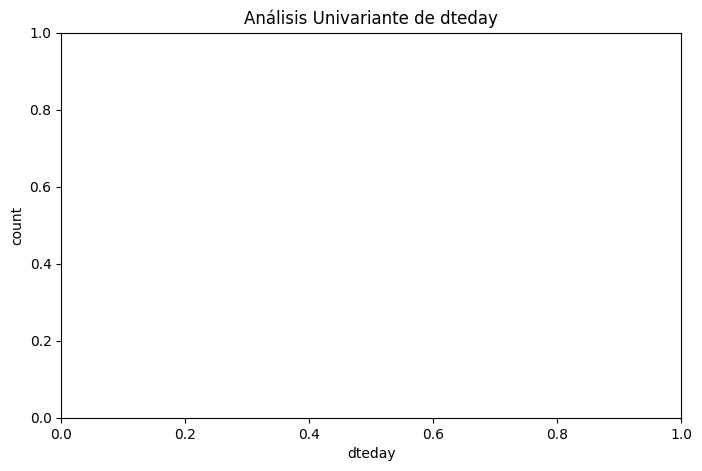

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 2.514 - Std: 1.105
IQR:
min    1.0
25%    2.0
50%    3.0
75%    3.0
max    4.0
Name: season, dtype: float64 
********************************************************************************


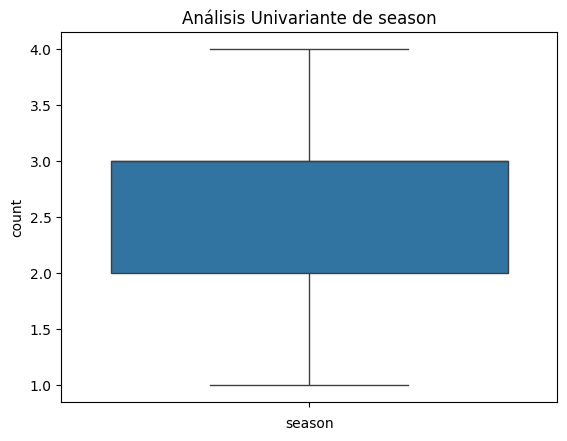

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 6.574 - Std: 3.428
IQR:
min     1.0
25%     4.0
50%     7.0
75%    10.0
max    12.0
Name: mnth, dtype: float64 
********************************************************************************


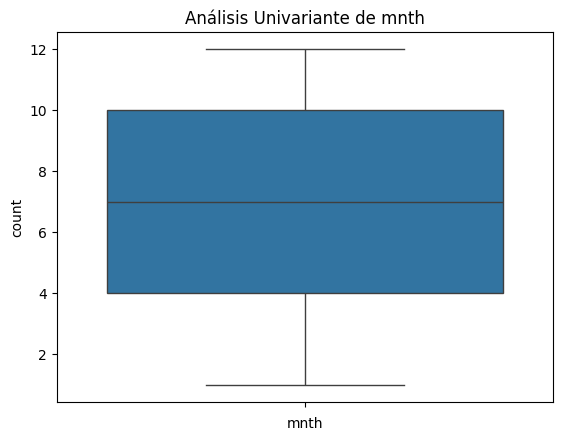

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 15.665 - Std: 8.793
IQR:
min     1.0
25%     8.0
50%    16.0
75%    23.0
max    31.0
Name: day, dtype: float64 
********************************************************************************


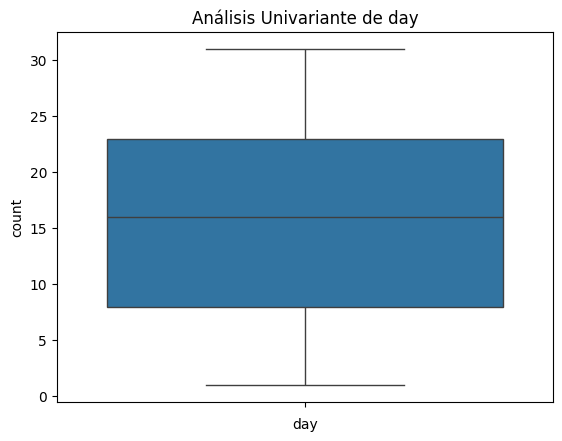

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 11.574 - Std: 6.908
IQR:
min     0.0
25%     6.0
50%    12.0
75%    18.0
max    23.0
Name: hr, dtype: float64 
********************************************************************************


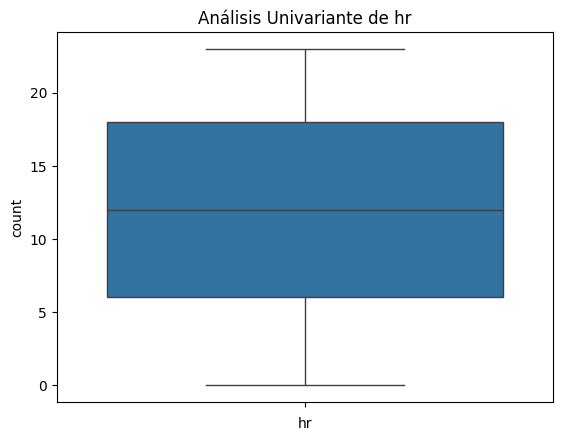

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 3.009 - Std: 2.001
IQR:
min    0.0
25%    1.0
50%    3.0
75%    5.0
max    6.0
Name: weekday, dtype: float64 
********************************************************************************


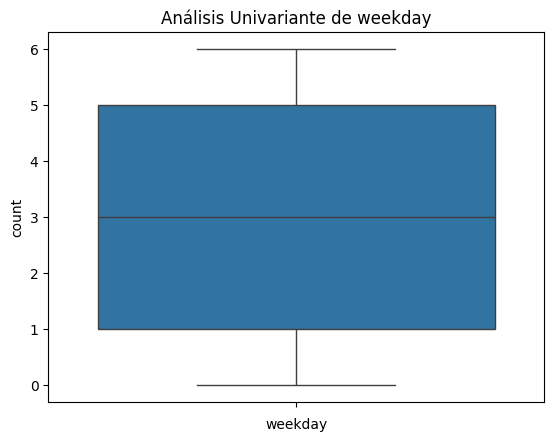

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 0.036 - Std: 0.186
IQR:
min    0.0
25%    0.0
50%    0.0
75%    0.0
max    1.0
Name: holiday, dtype: float64 
********************************************************************************


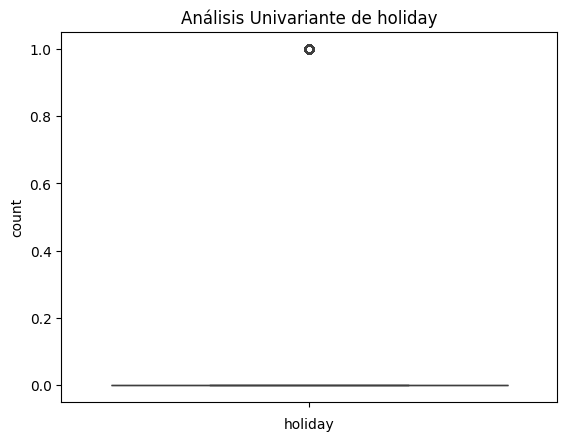

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 0.686 - Std: 0.464
IQR:
min    0.0
25%    0.0
50%    1.0
75%    1.0
max    1.0
Name: workingday, dtype: float64 
********************************************************************************


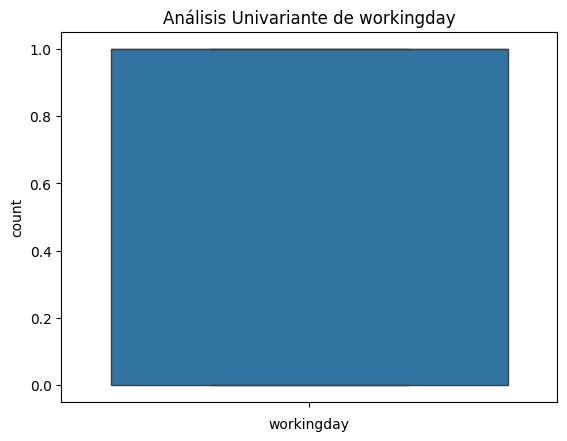

************************************************************************************************************************
Estadística Descriptiva
Media: 20.035049161364952 - Mediana: 20.0 - Moda: 25.0 - Std: 8.126 - Q1: 13.0 - Q3: 27.0 
************************************************************************************************************************


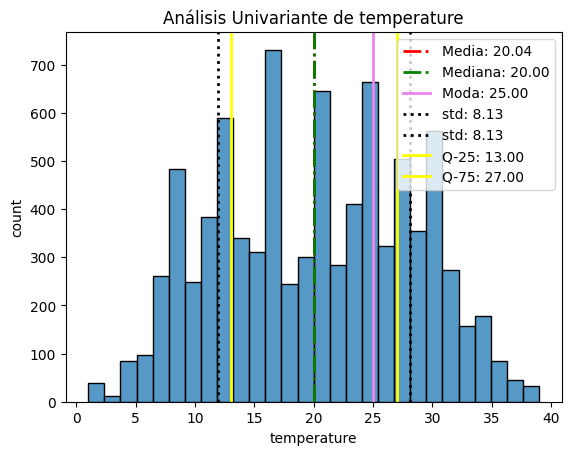

************************************************************************************************************************
Estadística Descriptiva
Media: 23.453788316946213 - Mediana: 24.0 - Moda: 33.0 - Std: 8.851 - Q1: 16.0 - Q3: 31.0 
************************************************************************************************************************


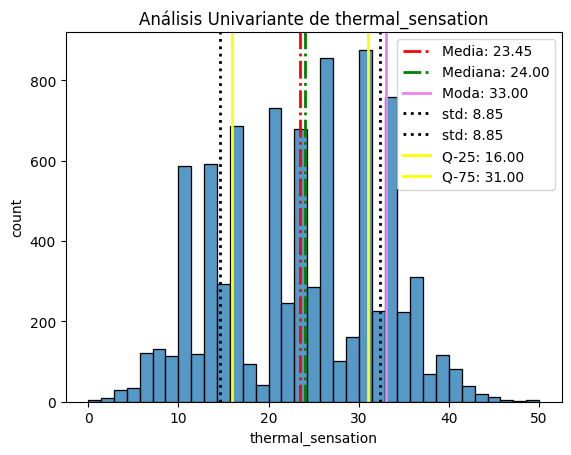

************************************************************************************************************************
Estadística Descriptiva
Media: 64.34297281665702 - Mediana: 65.0 - Moda: 94.0 - Std: 19.629 - Q1: 49.0 - Q3: 81.0 
************************************************************************************************************************


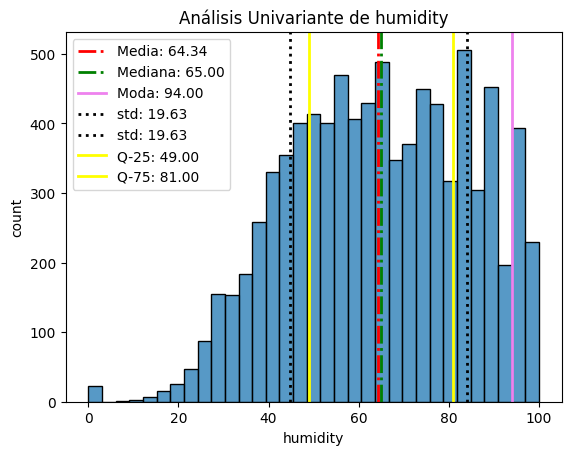

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 1.438 - Std: 0.654
IQR:
min    1.0
25%    1.0
50%    1.0
75%    2.0
max    4.0
Name: weathersit, dtype: float64 
********************************************************************************


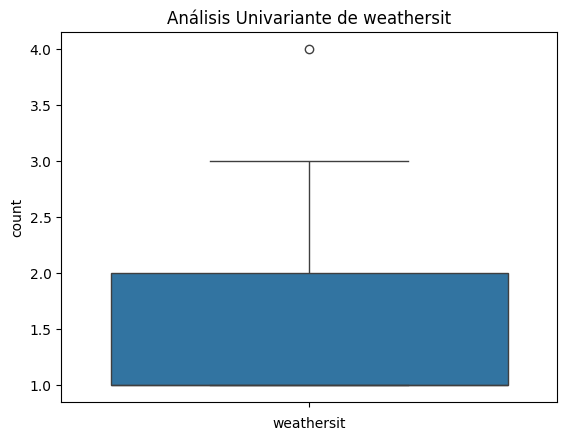

************************************************************************************************************************
Estadística Descriptiva
Media: 12.808212839791787 - Mediana: 13.0 - Moda: 0.0 - Std: 8.254 - Q1: 7.0 - Q3: 19.0 
************************************************************************************************************************


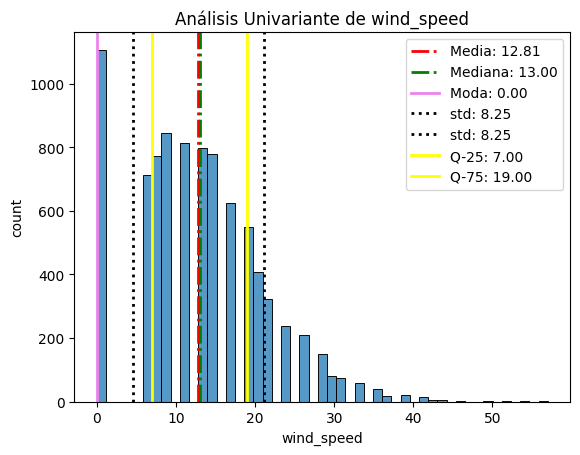

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 28.601 - Std: 38.841
IQR:
min      0.0
25%      3.0
50%     14.0
75%     38.0
max    272.0
Name: casual, dtype: float64 
********************************************************************************


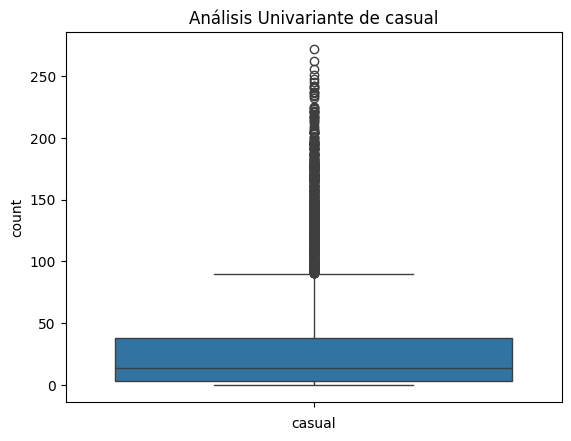

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 115.194 - Std: 109.461
IQR:
min      0.0
25%     26.0
50%     90.0
75%    168.0
max    567.0
Name: registered, dtype: float64 
********************************************************************************


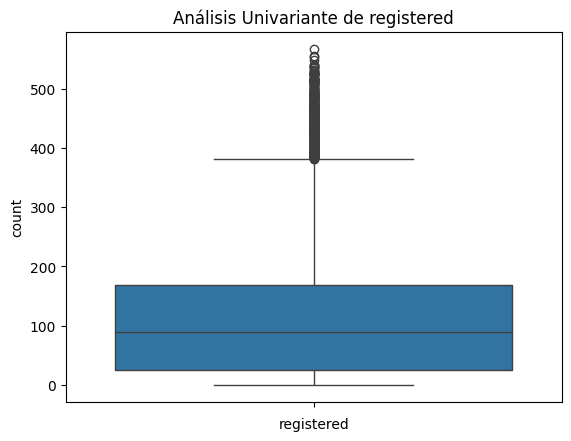

********************************************************************************
Estadística Descriptiva
Cantidad: 8645.0 - Media: 143.794 - Std: 133.798
IQR:
min      1.0
25%     31.0
50%    109.0
75%    211.0
max    651.0
Name: cnt, dtype: float64 
********************************************************************************


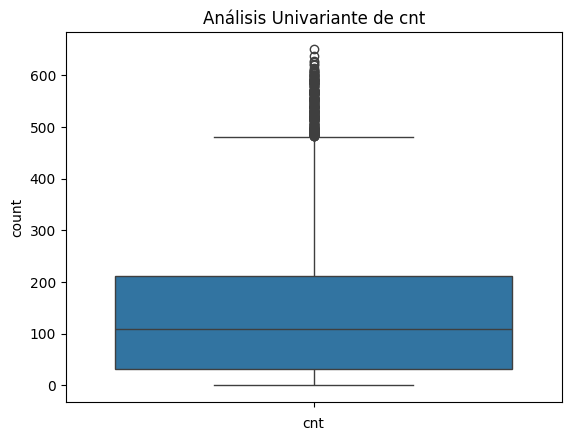

In [67]:
analisis_univariante(df2011)

### Análisis Bivariante

> #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto en la cantidad de viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas y una disminución en las estaciones más frías.**
 

Utilización Estacional:
- ¿Cómo varía la frecuencia de uso de las bicicletas a lo largo de las estaciones del año?
- ¿Hay alguna estación en la que se observa un aumento o disminución significativa en el uso de bicicletas?

Diferencias entre Estaciones:
- ¿Existen patrones de uso de bicicletas distintos entre estaciones para clientes casuales y registrados?

Preferencias Estacionales:
- ¿Hay estaciones específicas del año en las que los clientes casuales tienden a usar más bicicletas que los registrados, o viceversa?

Patrones Diarios:
- ¿Cómo se distribuye el uso de bicicletas a lo largo del día en diferentes estaciones del año?
- ¿Existen horas pico o valle que difieran entre estaciones?

Impacto del Clima:
- ¿El clima en cada estación del año afecta la utilización de bicicletas de manera significativa?
- ¿Puedes identificar alguna tendencia en la relación entre las condiciones climáticas y la elección de bicicletas por parte de los clientes?

**Podemos confirmar que faltan datos, ya que en esas horas no hubo ningún registro. Por ende, no figura en el DataFrame**

****

>

****

- ¿Cómo varía la frecuencia de uso de las bicicletas a lo largo de las estaciones del año?
- ¿Hay alguna estación en la que se observa un aumento o disminución significativa en el uso de bicicletas?

In [41]:
df2011.query('mnth == 12 and season == 4')

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
7905,2011-12-01,4,12,1,0,3,0,1,11.0,13.0,52.0,1,22.0,1,19,20
7906,2011-12-01,4,12,1,1,3,0,1,11.0,12.0,60.0,1,19.0,1,9,10
7907,2011-12-01,4,12,1,2,3,0,1,11.0,11.0,56.0,1,20.0,1,8,9
7908,2011-12-01,4,12,1,3,3,0,1,11.0,12.0,56.0,1,17.0,1,6,7
7909,2011-12-01,4,12,1,4,3,0,1,11.0,12.0,56.0,1,19.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8380,2011-12-20,4,12,20,19,1,0,1,16.0,20.0,66.0,1,0.0,6,218,224
8381,2011-12-20,4,12,20,20,1,0,1,15.0,19.0,66.0,1,0.0,3,144,147
8382,2011-12-20,4,12,20,21,1,0,1,15.0,18.0,66.0,1,6.0,4,139,143


In [42]:
# df2011.query('mnth == 12 and dteday == "2011-12-25"')

df2011.query('mnth == 12 and season == 1')

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
8385,2011-12-21,1,12,21,0,2,0,1,14.0,17.0,71.0,2,9.0,7,18,25
8386,2011-12-21,1,12,21,1,2,0,1,15.0,18.0,66.0,2,7.0,1,10,11
8387,2011-12-21,1,12,21,2,2,0,1,15.0,19.0,71.0,2,0.0,0,4,4
8388,2011-12-21,1,12,21,3,2,0,1,15.0,19.0,71.0,2,0.0,0,2,2
8389,2011-12-21,1,12,21,4,2,0,1,15.0,19.0,71.0,2,0.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92
8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71
8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52


In [44]:
df_pregunta1 = df2011.groupby(['season','mnth'],sort=False)[['cnt']].sum().reset_index().set_index('season').rename({1:'Invierno',2:'Primavera',3:'Verano',4:'Otoño'},axis='index')
df_pregunta1

,mnth,cnt
season,,
Invierno,1,38189
Invierno,2,48215
Invierno,3,41206
Primavera,3,22839
Primavera,4,94870
Primavera,5,135821
Primavera,6,93786
Verano,6,49726
Verano,7,141341


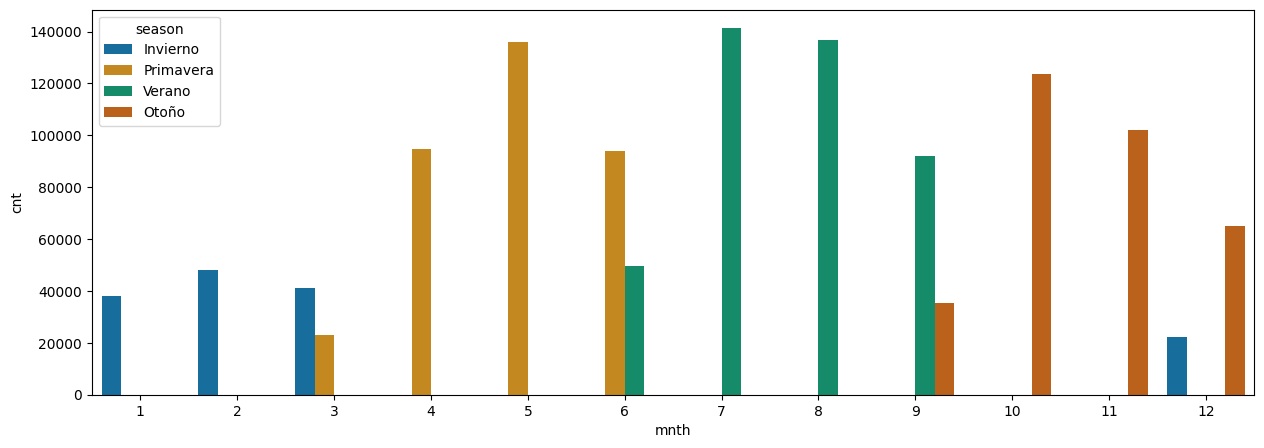

In [45]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data= df_pregunta1, x='mnth',y='cnt',hue='season', palette='colorblind',dodge=True)
sns.move_legend(ax, "upper left");

In [46]:

#Tengo que hacer un pivot table donde casual y regsistered compartan un mismo name que iria en el hue y el otro indice corresponde a mes
test2 = df2011.groupby(['mnth']).aggregate({'casual':'sum', 'registered': 'sum'}).reset_index()
test2.set_index('mnth',append=['registered'])

,,casual,registered
,mnth,,
0,1,3073,35116
1,2,6242,41973
2,3,12826,51219
3,4,22346,72524
4,5,31050,104771
5,6,30612,112900
6,7,36452,104889
7,8,28842,107849
8,9,26545,100873


Prueba métrica porque en el anterior gráfico no tnemos clima. tenemos la temporada nada más. 
Se me ocurrió hacer un rango con la temperatura y sensacion termica por temporada

******

*****